# Introduction

# Describe the problem and the source of data

# Import needed libraries and setting global variables

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

sns.set_theme()
random_state = 42

# Data Cleaning

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## Describe the data statistically and visualize the data

In [3]:
df["Pregnancies"].unique()

array([ 2,  0,  1,  4,  8,  3,  6,  5,  7, 10, 12,  9, 11, 13, 15, 17, 14],
      dtype=int64)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='count'>

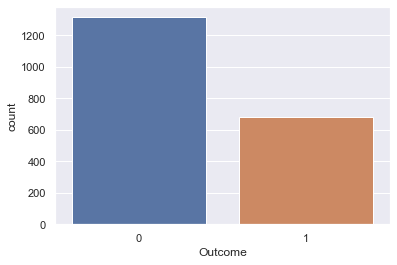

In [6]:
sns.countplot(x=df['Outcome'])

<Figure size 1152x720 with 0 Axes>

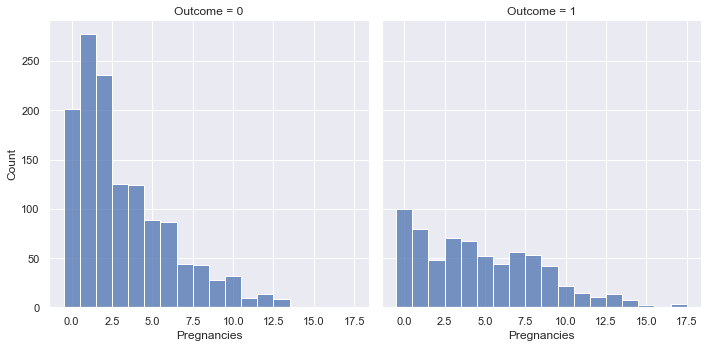

In [7]:
plt.figure(figsize=(16,10))
hist_pre = sns.displot(data=df, x="Pregnancies", col="Outcome", discrete=True, bins=df["Pregnancies"].unique().shape[0])

# hist_pre.set_xticklabels(range(0,df["Pregnancies"].max()+1))

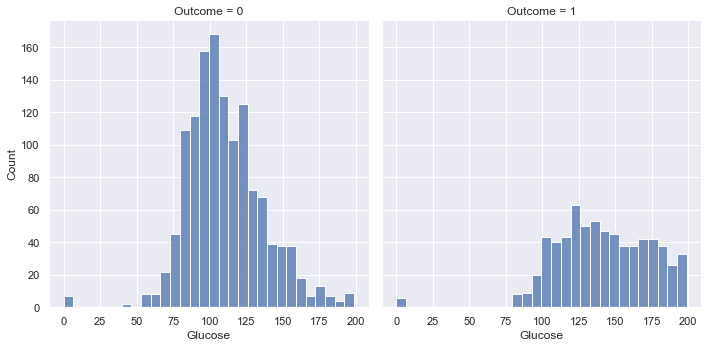

In [8]:
sns.displot(data=df, x="Glucose", col="Outcome")

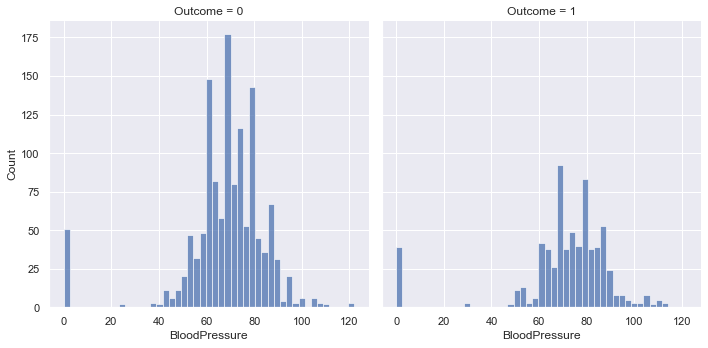

In [9]:
sns.displot(data=df, x="BloodPressure", col="Outcome")

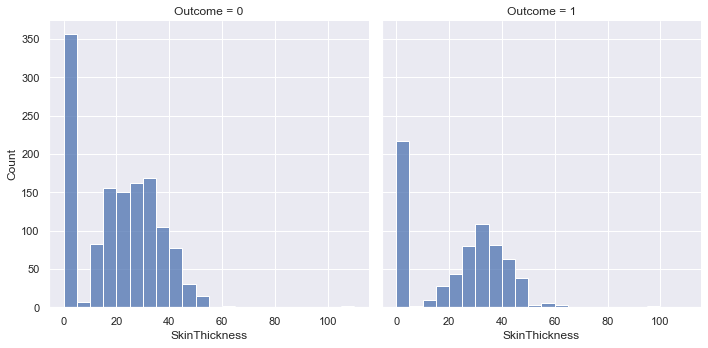

In [10]:
sns.displot(data=df, x="SkinThickness", col="Outcome")

In [11]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


<AxesSubplot:>

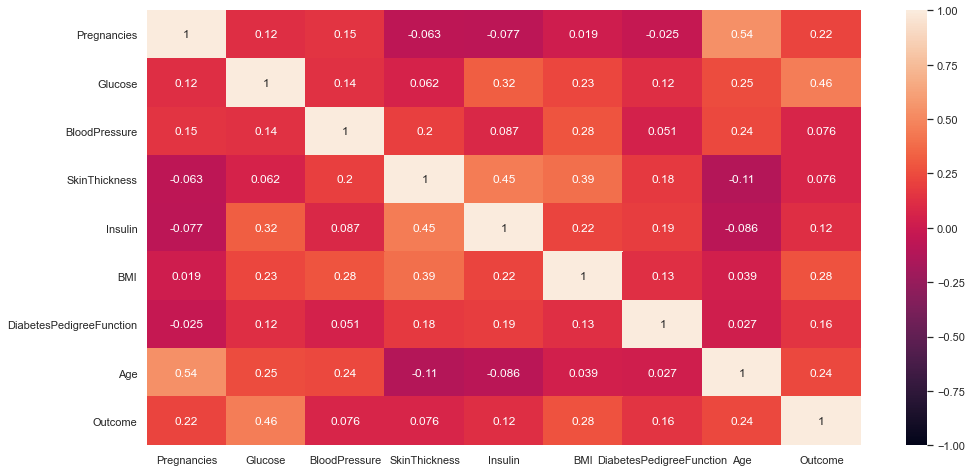

In [12]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)

In [13]:
df[['Glucose','BloodPressure','SkinThickness','BMI','Insulin']].replace(0,np.NaN).isnull().sum()

Glucose           13
BloodPressure     90
SkinThickness    573
BMI               28
Insulin          956
dtype: int64

In [14]:
df['Glucose'].replace(0,np.NaN,inplace=True)
df['BloodPressure'].replace(0,np.NaN,inplace=True)
df['SkinThickness'].replace(0,np.NaN,inplace=True)
df['BMI'].replace(0,np.NaN,inplace=True)
df['Insulin'].replace(0,np.NaN,inplace=True)

In [15]:
df['Glucose'].fillna(df['Glucose'].mean(),inplace=True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

In [16]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138.0,62.000000,35.0,126.0,33.6,0.127,47,1
1,0,84.0,82.000000,31.0,125.0,38.2,0.233,23,0
2,0,145.0,72.403665,29.0,126.0,44.2,0.630,31,1
3,0,135.0,68.000000,42.0,250.0,42.3,0.365,24,1
4,1,139.0,62.000000,41.0,480.0,40.7,0.536,21,0
...,...,...,...,...,...,...,...,...,...
1995,2,75.0,64.000000,24.0,55.0,29.7,0.370,33,0
1996,8,179.0,72.000000,42.0,130.0,32.7,0.719,36,1
1997,6,85.0,78.000000,29.0,126.0,31.2,0.382,42,0
1998,0,129.0,110.000000,46.0,130.0,67.1,0.319,26,1


## Preprocessing the data

In [17]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [18]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=random_state)

# Models

## Grid Search Explanation

## K-Nearest Neighbors

In [19]:
param_dict = {
    "n_neighbors":[1,3,5,7,9,100,200,300,400,500,600,700,800,900,1000,1100],
    "weights": ["uniform", "distance"],
}

knn_gs = GridSearchCV(KNeighborsClassifier(), param_grid=param_dict, cv=5, scoring="accuracy")

In [20]:
knn_gs.fit(train_X, train_y)
knn_gs.best_params_

{'n_neighbors': 100, 'weights': 'distance'}

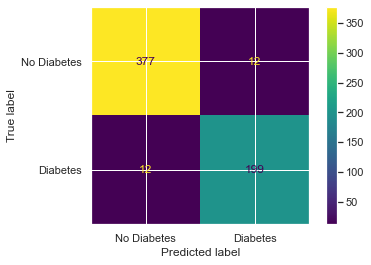

In [21]:
test_predict = knn_gs.predict(test_X)
plot_confusion_matrix(knn_gs, test_X, test_y, display_labels=["No Diabetes", "Diabetes"])

In [22]:
knn_accuracy = accuracy_score(test_y, test_predict)
knn_precision  = precision_score(test_y, test_predict)
knn_recall  = recall_score(test_y, test_predict)
print(knn_accuracy, knn_precision, knn_recall)

0.96 0.943127962085308 0.943127962085308


## Support Vector Machines

In [23]:
param_dict = {
    "kernel":["poly"],
    "degree": [8,10,15]
}

svc_gs = GridSearchCV(SVC(), param_grid=param_dict, cv=5, scoring="accuracy")

In [24]:
#svc_gs.fit(train_X, train_y)
#svc_gs.best_params_

In [25]:
#test_predict = svc_gs.predict(test_X)
#plot_confusion_matrix(svc_gs, test_X, test_y, display_labels=["No Diabetes", "Diabetes"])

In [26]:
#svc_accuracy = accuracy_score(test_y, test_predict)
#svc_precision  = precision_score(test_y, test_predict)
#svc_recall  = recall_score(test_y, test_predict)
#print(svc_accuracy, svc_precision, svc_recall)

## Decision Tree

In [27]:
clf_dt = DecisionTreeClassifier(random_state=random_state)
clf_dt.fit(train_X, train_y)

DecisionTreeClassifier(random_state=42)

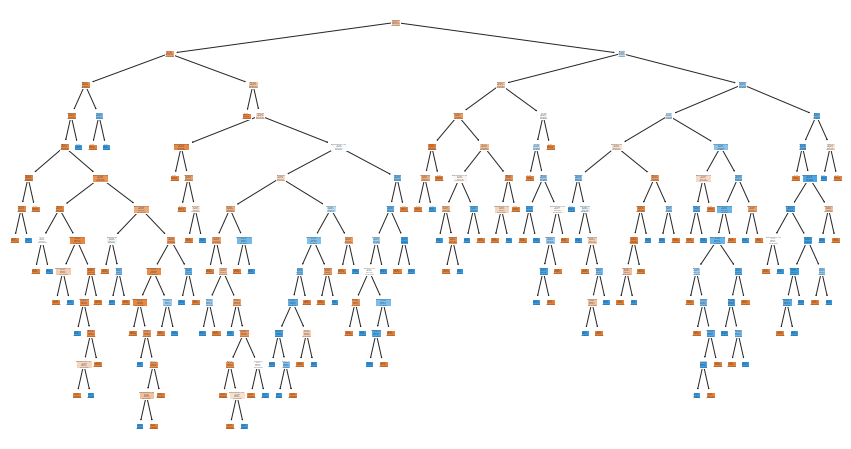

In [28]:
# The size of the figure
plt.figure(figsize=(15, 8))
plot_tree(clf_dt, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()

In [29]:
# Metrics
dt_prediction = clf_dt.predict(test_X)
dt_accuracy = accuracy_score(test_y, dt_prediction)
dt_precision = precision_score(test_y, dt_prediction)
dt_recall = recall_score(test_y, dt_prediction)
print(dt_accuracy, dt_precision, dt_recall)

0.9516666666666667 0.9252336448598131 0.9383886255924171


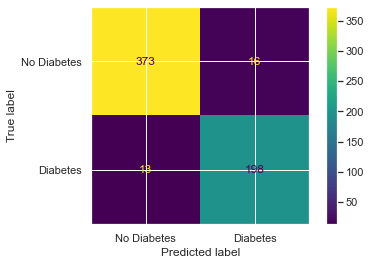

In [30]:
plot_confusion_matrix(clf_dt, test_X, test_y, display_labels=["No Diabetes", "Diabetes"])
plt.show()

#### CCP

In [31]:
ccp_alphas = clf_dt.cost_complexity_pruning_path(train_X, train_y)["ccp_alphas"] # list of possible alphas
ccp_alphas

array([0.        , 0.00069264, 0.00069597, 0.00095238, 0.00095238,
       0.00101403, 0.00104762, 0.00114286, 0.00119048, 0.00119048,
       0.00122449, 0.00125   , 0.00125   , 0.0012605 , 0.00126984,
       0.00128571, 0.0012987 , 0.00133929, 0.00135714, 0.00136364,
       0.00138528, 0.00140329, 0.00141783, 0.00152903, 0.00179104,
       0.00180451, 0.00190476, 0.00192481, 0.00192857, 0.00197252,
       0.00197831, 0.00203202, 0.00204082, 0.00218539, 0.00222222,
       0.00222222, 0.00237365, 0.00238636, 0.00258018, 0.00262857,
       0.00267857, 0.00272385, 0.00299446, 0.00304587, 0.0031144 ,
       0.00312547, 0.00323487, 0.00348033, 0.00351087, 0.00364808,
       0.00366061, 0.00377056, 0.00383281, 0.00439352, 0.00448545,
       0.00457143, 0.00544573, 0.00585515, 0.0060955 , 0.00637065,
       0.00707508, 0.00799922, 0.0093622 , 0.01477243, 0.01758752,
       0.0200153 , 0.07897237])

In [32]:
alphas_list = []
for alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=random_state, ccp_alpha=alpha)
    scores = cross_val_score(clf_dt, train_X, train_y, scoring="accuracy", cv=5)
    alphas_list.append([alpha, np.mean(scores)])

alphas_df = pd.DataFrame(alphas_list, columns=["Alpha", "Mean"])
alphas_df.sort_values("Mean", ascending=False).head()

,Alpha,Mean
0,0.000000,0.933571
2,0.000696,0.932143
1,0.000693,0.932143
3,0.000952,0.922143
4,0.000952,0.922143


In [33]:
best_alpha = float(alphas_df.sort_values("Mean", ascending=False).head(1)["Alpha"])
best_alpha

0.0

In [34]:
clf_dt = DecisionTreeClassifier(random_state=random_state, ccp_alpha=best_alpha)
clf_dt.fit(train_X, train_y)

DecisionTreeClassifier(random_state=42)

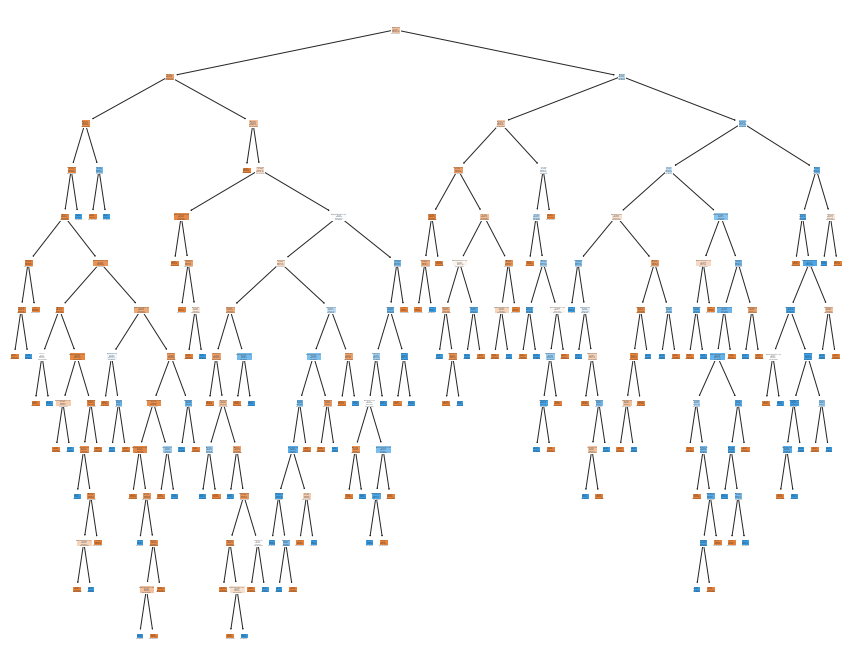

In [35]:
plt.figure(figsize=(15, 12))
plot_tree(clf_dt, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()

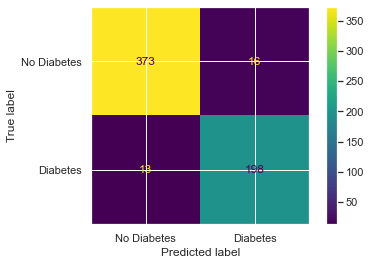

In [36]:
plot_confusion_matrix(clf_dt, test_X, test_y, display_labels=["No Diabetes", "Diabetes"])
plt.show()

In [37]:
dt_prediction = clf_dt.predict(test_X)
ccp_accuracy = accuracy_score(test_y, dt_prediction)
ccp_precision = precision_score(test_y, dt_prediction)
ccp_recall = recall_score(test_y, dt_prediction)
print(ccp_accuracy, ccp_precision, ccp_recall)

0.9516666666666667 0.9252336448598131 0.9383886255924171


## Random Forest

In [43]:
param_dict = {
    "n_estimators":[50,100,200,300,400,500],
    "criterion": ["gini", "entropy"],
}

rf_gs = GridSearchCV(RandomForestClassifier(), param_grid=param_dict, cv=5, scoring="accuracy")

In [44]:
rf_gs.fit(train_X, train_y)
rf_gs.best_params_

{'criterion': 'entropy', 'n_estimators': 100}

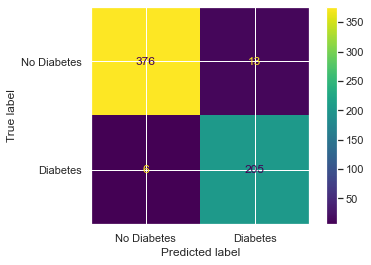

In [45]:
test_predict = rf_gs.predict(test_X)
plot_confusion_matrix(rf_gs, test_X, test_y, display_labels=["No Diabetes", "Diabetes"])

In [46]:
rf_accuracy = accuracy_score(test_y, test_predict)
rf_precision  = precision_score(test_y, test_predict)
rf_recall  = recall_score(test_y, test_predict)
print(rf_accuracy, rf_precision, rf_recall)

0.9683333333333334 0.9403669724770642 0.9715639810426541


## Voting Models -> ensemble learning

# Conclusion

## Compare the models